# Regression Analysis on COVID-19 Data

Dataset for this Regression Analysis is taken from https://github.com/CSSEGISandData/COVID-19 

In this SVM model for regression is trained on confirmed cases of the world.

In [1]:
import time
import math
import random
import datetime
import operator 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

### Preprocessing data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cols = df.keys()
confirmed = df.loc[:, cols[4]:cols[-1]]

In [3]:
dates = confirmed.keys()
world_cases = []

cases_us = [] 
cases_china = [] 
cases_italy = []
cases_spain = [] 
cases_france = [] 
cases_india = []

for i in dates:
    col_sums = confirmed[i].sum()
    
    world_cases.append(col_sums)
    
    
    cases_china.append(df[df['Country/Region']=='China'][i].sum())
    cases_italy.append(df[df['Country/Region']=='Italy'][i].sum())
    cases_us.append(df[df['Country/Region']=='US'][i].sum())
    cases_spain.append(df[df['Country/Region']=='Spain'][i].sum())
    cases_france.append(df[df['Country/Region']=='France'][i].sum())
    cases_india.append(df[df['Country/Region']=='India'][i].sum())
    

In [4]:
days_from_22_1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)

In [5]:
days_in_future = 10
temp = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = temp[:-10]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(days_from_22_1, world_cases, test_size=0.10, shuffle=False)

### Visualizing cases of different countries

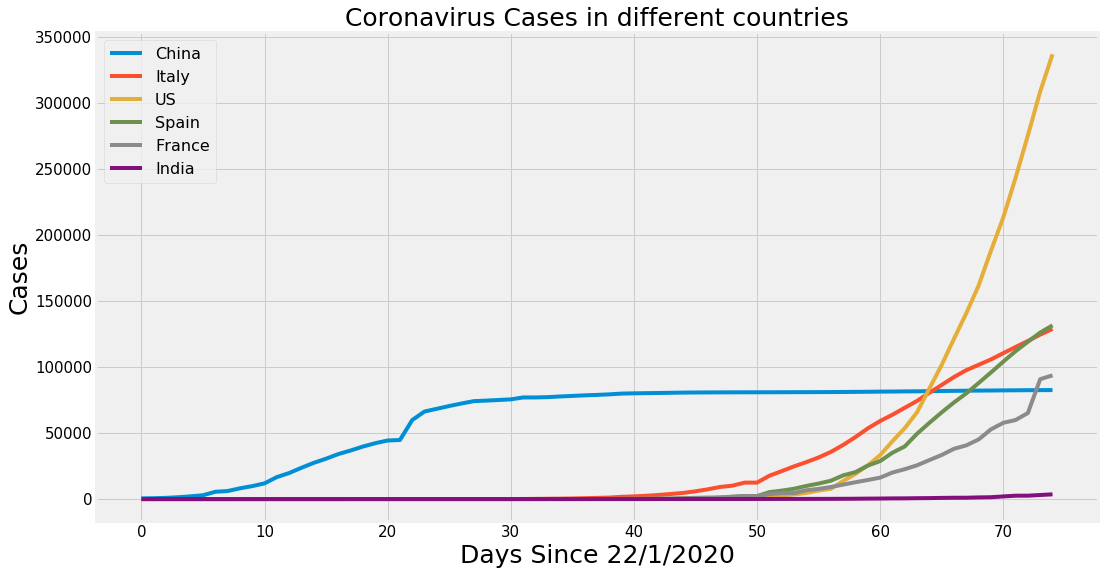

In [7]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, cases_china)
plt.plot(adjusted_dates, cases_italy)
plt.plot(adjusted_dates, cases_us)
plt.plot(adjusted_dates, cases_spain)
plt.plot(adjusted_dates, cases_france)
plt.plot(adjusted_dates, cases_india)
plt.title('Coronavirus Cases in different countries', size=25)
plt.xlabel('Days Since 22/1/2020', size=25)
plt.ylabel('Cases', size=25)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France','India'], prop={'size': 16})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### Hyperparameter tuning for SVM Regressor

In [8]:
# c = [0.01, 0.1, 1]
# degree = [3, 4, 5, 6, 7]
# epsilon = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# shrinking = [True, False]


# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

# svmCV = SVR(kernel='poly')
# svm_search = GridSearchCV(svmCV, svm_grid,cv=5, return_train_score=True, n_jobs=-1)
# svm_search.fit(X_train, y_train)

In [9]:
# svm_search.best_params_

In [10]:
# svm = svm_search.best_estimator_

### Model training and testing

In [11]:
svm = SVR(kernel='poly', C=0.1, degree=7, epsilon=0.1, gamma=0.01, shrinking=True)
svm.fit(X_train, y_train)

C:\Users\Dhrumin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=7, epsilon=0.1, gamma=0.01,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

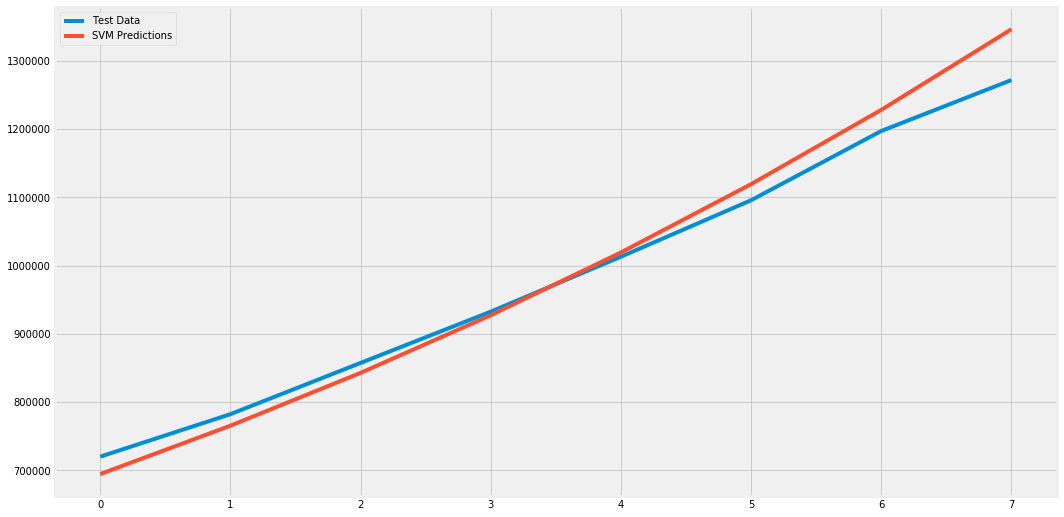

MAE: 24676.382178783417
MSE: 1032996111.174248


In [12]:
# check against testing data
y_pred = svm.predict(X_test)
plt.figure(figsize=(16, 9))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])
plt.show()
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))